In [1]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
iris = sns.load_dataset("iris")

In [3]:
# Split features and labels
x = iris.values[:, :4]
y = iris.values[:, 4]

In [4]:
# Split training and testing data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.5, random_state=0)

In [5]:
# One-hot Encoding
from keras.utils import to_categorical
def one_hot_encoder(arr):
    uniques, idx = np.unique(arr, return_inverse=True)
    return to_categorical(idx, len(uniques))

train_y_encoded = one_hot_encoder(train_y)
test_y_encoded = one_hot_encoder(test_y)

/home/sitibanc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
# Build Model
from keras.models import Model
from keras.layers import Input, Dense

In [7]:
inputs = Input(shape=(4,), name="input")
x = Dense(16, activation="sigmoid", name="h1")(inputs)
x = Dense(16, activation="sigmoid", name="h2")(x)
outputs = Dense(3, activation="softmax", name="output")(x)

model = Model(inputs, outputs)

In [8]:
# ====================
# Sequential
# ====================
from keras.models import Sequential
model2 = Sequential()

model2.add(Dense(16, activation="sigmoid", name="h1", input_dim=4))
model2.add(Dense(16, activation="sigmoid", name="h2"))
model2.add(Dense(3, activation="softmax", name="output"))

In [9]:
# Print Summary
print("=== Model ===")
model.summary()
print("=== Sequential ===")
model2.summary()

=== Model ===
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 4)                 0         
_________________________________________________________________
h1 (Dense)                   (None, 16)                80        
_________________________________________________________________
h2 (Dense)                   (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________
=== Sequential ===
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 16)                80        
_____________________________________________

In [10]:
# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
history = model.fit(train_x, train_y_encoded, validation_data=(test_x, test_y_encoded), epochs=100, batch_size=8)

Train on 75 samples, validate on 75 samples
Epoch 1/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0661 - acc: 0.3867 - val_loss: 1.0822 - val_acc: 0.2800
Epoch 2/100
75/75 [==============================] - 0s 150us/step - loss: 1.0549 - acc: 0.5467 - val_loss: 1.0786 - val_acc: 0.5467
Epoch 3/100
75/75 [==============================] - 0s 139us/step - loss: 1.0476 - acc: 0.7333 - val_loss: 1.0757 - val_acc: 0.6000
Epoch 4/100
75/75 [==============================] - 0s 141us/step - loss: 1.0383 - acc: 0.7333 - val_loss: 1.0722 - val_acc: 0.6000
Epoch 5/100
75/75 [==============================] - 0s 135us/step - loss: 1.0292 - acc: 0.7333 - val_loss: 1.0694 - val_acc: 0.6000
Epoch 6/100
75/75 [==============================] - 0s 145us/step - loss: 1.0201 - acc: 0.7333 - val_loss: 1.0670 - val_acc: 0.6000
Epoch 7/100
75/75 [==============================] - 0s 141us/step - loss: 1.0113 - acc: 0.7333 - val_loss: 1.0629 - val_acc: 0.6000
Epoch 8/100
75/75 [========

Epoch 62/100
75/75 [==============================] - 0s 149us/step - loss: 0.4245 - acc: 0.8933 - val_loss: 0.5118 - val_acc: 0.8133
Epoch 63/100
75/75 [==============================] - 0s 141us/step - loss: 0.4193 - acc: 0.8933 - val_loss: 0.5081 - val_acc: 0.8000
Epoch 64/100
75/75 [==============================] - 0s 140us/step - loss: 0.4151 - acc: 0.8933 - val_loss: 0.5041 - val_acc: 0.7867
Epoch 65/100
75/75 [==============================] - 0s 144us/step - loss: 0.4108 - acc: 0.9067 - val_loss: 0.4967 - val_acc: 0.8267
Epoch 66/100
75/75 [==============================] - 0s 140us/step - loss: 0.4064 - acc: 0.9067 - val_loss: 0.4933 - val_acc: 0.8267
Epoch 67/100
75/75 [==============================] - 0s 143us/step - loss: 0.4035 - acc: 0.9067 - val_loss: 0.4925 - val_acc: 0.7867
Epoch 68/100
75/75 [==============================] - 0s 143us/step - loss: 0.3982 - acc: 0.8933 - val_loss: 0.4881 - val_acc: 0.7867
Epoch 69/100
75/75 [==============================] - 0s 138us

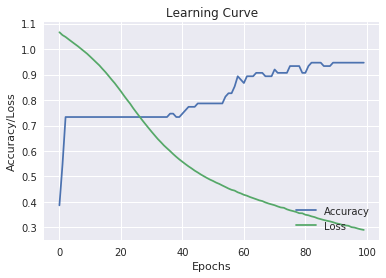

In [12]:
# Plot result
from matplotlib import pyplot as plt
sns.set(color_codes=True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.title("Learning Curve")
plt.plot(history.history["acc"], label="Accuracy")
plt.plot(history.history["loss"], label="Loss")
plt.legend(loc="lower right")
plt.show()

In [13]:
# Testing
loss, accuracy = model.evaluate(test_x, test_y_encoded)
print("Testing Loss:%.5f Accuracy:%.2f%%" % (loss, accuracy*100))

75/75 [==============================] - 0s 33us/step
Testing Loss:0.35849 Accuracy:98.67%


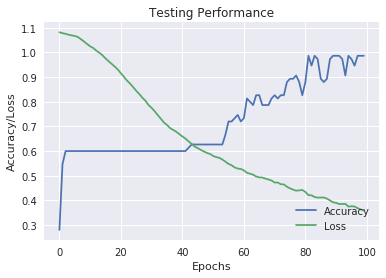

In [14]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.title("Testing Performance")
plt.plot(history.history["val_acc"], label="Accuracy")
plt.plot(history.history["val_loss"], label="Loss")
plt.legend(loc="lower right")
plt.show()

In [15]:
preds = model.predict(test_x)

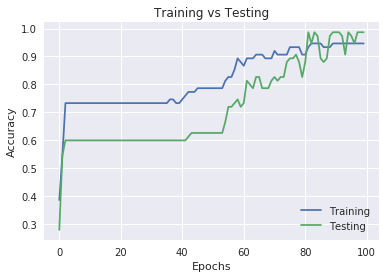

In [16]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Testing")
plt.plot(history.history["acc"], label="Training")
plt.plot(history.history["val_acc"], label="Testing")
plt.legend(loc="lower right")
plt.show()